<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.285126,93.464467,67.994672,83.348440,-2708.180620,-2362.087915,2562.905840,-4924.993755
1,0.0,1.0,38.461766,68.994289,53.525368,93.649656,-5471.307041,-5206.675960,-1018.118793,-4188.557168
2,0.0,2.0,63.192313,84.114474,56.087679,55.296606,8509.818142,8778.509214,3119.685727,5658.823487
3,0.0,3.0,55.022761,49.472028,59.122835,61.276753,515.437413,750.331790,150.398796,599.932995
4,0.0,4.0,45.527880,53.683302,94.115484,50.822549,3313.474194,3567.623409,1694.025727,1873.597682
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.529963,43.651163,27.829526,42.203015,-2943.788623,-2741.574955,1955.489702,-4697.064657
19996,999.0,16.0,28.899016,35.738896,96.613610,44.759027,-291.457255,-75.446707,-868.059797,792.613089
19997,999.0,17.0,32.108222,24.029980,63.832325,51.112285,288.091599,469.174411,1159.155872,-689.981461
19998,999.0,18.0,68.250715,54.827207,77.587221,88.444260,-1887.642965,-1588.533562,-2987.940107,1399.406546


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    91.285126  93.464467  67.994672  83.348440 -2708.180620   
      1.0    38.461766  68.994289  53.525368  93.649656 -5471.307041   
      2.0    63.192313  84.114474  56.087679  55.296606  8509.818142   
      3.0    55.022761  49.472028  59.122835  61.276753   515.437413   
      4.0    45.527880  53.683302  94.115484  50.822549  3313.474194   
...                ...        ...        ...        ...          ...   
999.0 15.0   78.529963  43.651163  27.829526  42.203015 -2943.788623   
      16.0   28.899016  35.738896  96.613610  44.759027  -291.457255   
      17.0   32.108222  24.029980  63.832325  51.112285   288.091599   
      18.0   68.250715  54.827207  77.587221  88.444260 -1887.642965   
      19.0   50.575954  51.798685  54.095169  63.940914    96.519502   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -2362.087915  2562.905840 -4924.993755  
      1.0   -5206.675960 -1018.118793 -4188.557168  
      2.0    8778.509214  3119.685727  5658.823487  
      3.0     750.331790   150.398796   599.932995  
      4.0    3567.623409  1694.025727  1873.597682  
...                  ...          ...          ...  
999.0 15.0  -2741.574955  1955.489702 -4697.064657  
      16.0    -75.446707  -868.059797   792.613089  
      17.0    469.174411  1159.155872  -689.981461  
      18.0  -1588.533562 -2987.940107  1399.406546  
      19.0    326.930224  -870.002087  1196.932311  

[20000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    91.285126  93.464467  67.994672  83.348440 -2708.180620   
      1.0    38.461766  68.994289  53.525368  93.649656 -5471.307041   
      2.0    63.192313  84.114474  56.087679  55.296606  8509.818142   
      3.0    55.022761  49.472028  59.122835  61.276753   515.437413   
      4.0    45.527880  53.683302  94.115484  50.822549  3313.474194   
...                ...        ...        ...        ...          ...   
999.0 15.0   78.529963  43.651163  27.829526  42.203015 -2943.788623   
      16.0   28.899016  35.738896  96.613610  44.759027  -291.457255   
      17.0   32.108222  24.029980  63.832325  51.112285   288.091599   
      18.0   68.250715  54.827207  77.587221  88.444260 -1887.642965   
      19.0   50.575954  51.798685  54.095169  63.940914    96.519502   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -2362.087915  2562.905840 -4924.993755  
      1.0   -5206.675960 -1018.118793 -4188.557168  
      2.0    8778.509214  3119.685727  5658.823487  
      3.0     750.331790   150.398796   599.932995  
      4.0    3567.623409  1694.025727  1873.597682  
...                  ...          ...          ...  
999.0 15.0  -2741.574955  1955.489702 -4697.064657  
      16.0    -75.446707  -868.059797   792.613089  
      17.0    469.174411  1159.155872  -689.981461  
      18.0  -1588.533562 -2987.940107  1399.406546  
      19.0    326.930224  -870.002087  1196.932311  

[20000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.285126,93.464467,67.994672,83.348440,-2708.180620,-2362.087915,2562.905840,-4924.993755
1,0.0,1.0,38.461766,68.994289,53.525368,93.649656,-5471.307041,-5206.675960,-1018.118793,-4188.557168
2,0.0,2.0,63.192313,84.114474,56.087679,55.296606,8509.818142,8778.509214,3119.685727,5658.823487
3,0.0,3.0,55.022761,49.472028,59.122835,61.276753,515.437413,750.331790,150.398796,599.932995
4,0.0,4.0,45.527880,53.683302,94.115484,50.822549,3313.474194,3567.623409,1694.025727,1873.597682
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,78.529963,43.651163,27.829526,42.203015,-2943.788623,-2741.574955,1955.489702,-4697.064657
19996,999.0,16.0,28.899016,35.738896,96.613610,44.759027,-291.457255,-75.446707,-868.059797,792.613089
19997,999.0,17.0,32.108222,24.029980,63.832325,51.112285,288.091599,469.174411,1159.155872,-689.981461
19998,999.0,18.0,68.250715,54.827207,77.587221,88.444260,-1887.642965,-1588.533562,-2987.940107,1399.406546


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    91.285126  93.464467  67.994672  83.348440 -2708.180620   
      1.0    38.461766  68.994289  53.525368  93.649656 -5471.307041   
      2.0    63.192313  84.114474  56.087679  55.296606  8509.818142   
      3.0    55.022761  49.472028  59.122835  61.276753   515.437413   
      4.0    45.527880  53.683302  94.115484  50.822549  3313.474194   
...                ...        ...        ...        ...          ...   
999.0 15.0   78.529963  43.651163  27.829526  42.203015 -2943.788623   
      16.0   28.899016  35.738896  96.613610  44.759027  -291.457255   
      17.0   32.108222  24.029980  63.832325  51.112285   288.091599   
      18.0   68.250715  54.827207  77.587221  88.444260 -1887.642965   
      19.0   50.575954  51.798685  54.095169  63.940914    96.519502   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -2362.087915  2562.905840 -4924.993755  
      1.0   -5206.675960 -1018.118793 -4188.557168  
      2.0    8778.509214  3119.685727  5658.823487  
      3.0     750.331790   150.398796   599.932995  
      4.0    3567.623409  1694.025727  1873.597682  
...                  ...          ...          ...  
999.0 15.0  -2741.574955  1955.489702 -4697.064657  
      16.0    -75.446707  -868.059797   792.613089  
      17.0    469.174411  1159.155872  -689.981461  
      18.0  -1588.533562 -2987.940107  1399.406546  
      19.0    326.930224  -870.002087  1196.932311  

[20000 rows x 8 columns]

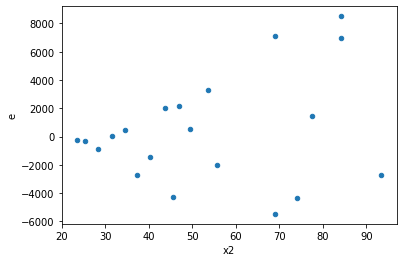

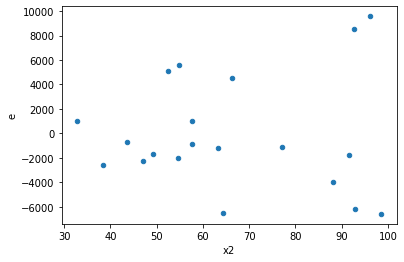

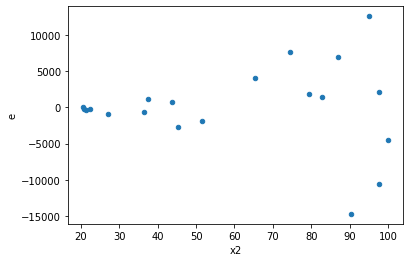

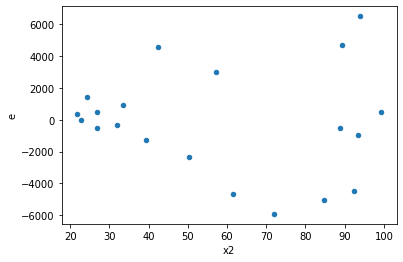

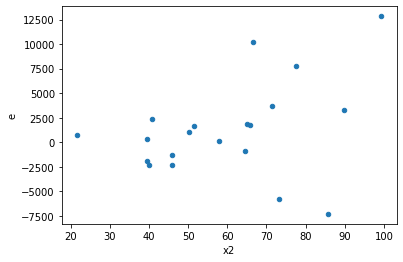

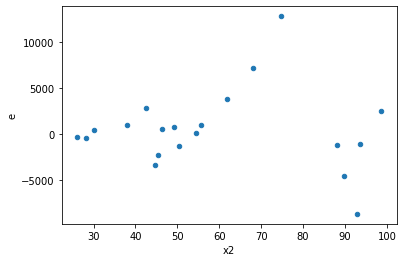

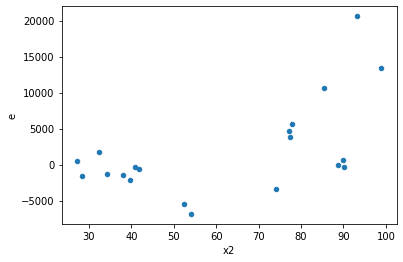

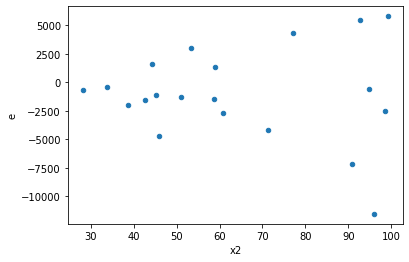

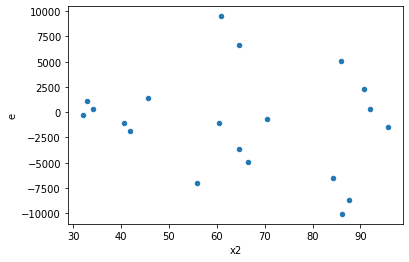

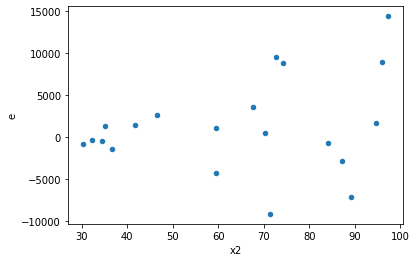

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,3.0,9.0,3052260.7469489207,166986015.83540013,1017420.2489829735,18554001.759488903,18.236320515574292,0.0007282757499595949,0.9996358621250202,0.00036413787497979744,Reject001=0 : Heteroscedasticity
1.0,5.0,7.0,46306694.15506117,167545553.8958317,9261338.831012234,23935079.12797596,2.584408103915569,0.24793030344160094,0.8760348482791995,0.12396515172080047,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,5031676.901166603,423838180.9090741,838612.8168611005,70639696.81817903,84.23398187805074,3.1733438836445416e-05,0.9999841332805818,1.5866719418222708e-05,Reject001=0 : Heteroscedasticity
3.0,8.0,4.0,32992401.683436528,87092789.09480432,4124050.210429566,21773197.27370108,5.2795664850630315,0.12542800125369347,0.9372859993731533,0.06271400062684673,Reject001=1 : Homoscedasticity
4.0,9.0,3.0,37222153.83423263,43297832.694958165,4135794.870470292,14432610.898319388,3.4896824795080366,0.33194817576196645,0.8340259121190168,0.16597408788098322,Reject001=1 : Homoscedasticity
6.0,4.0,8.0,11935796.510278463,245072893.16445357,2983949.127569616,30634111.645556696,10.266298229590712,0.006145625725800574,0.9969271871370997,0.003072812862900287,Reject001=0 : Heteroscedasticity
7.0,3.0,9.0,14445091.01839934,119402514.58742553,4815030.339466446,13266946.065269504,2.7553193084842773,0.20837620524931677,0.8958118973753416,0.10418810262465839,Reject001=1 : Homoscedasticity
10.0,4.0,8.0,24002669.99964054,225489105.08325323,6000667.499910135,28186138.135406654,4.697167129461642,0.060533135684768036,0.969733432157616,0.030266567842384018,Reject001=1 : Homoscedasticity
12.0,7.0,5.0,36293084.180181295,411824110.7555705,5184726.31145447,82364822.15111409,15.886050140997376,0.00772015855782171,0.9961399207210891,0.003860079278910855,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,3.0,9.0,3052260.7469489207,166986015.83540013,1017420.2489829735,18554001.759488903,18.236320515574292,0.0007282757499595949,Reject001=0 : Heteroscedasticity
1.0,5.0,7.0,46306694.15506117,167545553.8958317,9261338.831012234,23935079.12797596,2.584408103915569,0.24793030344160094,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,5031676.901166603,423838180.9090741,838612.8168611005,70639696.81817903,84.23398187805074,3.1733438836445416e-05,Reject001=0 : Heteroscedasticity
3.0,8.0,4.0,32992401.683436528,87092789.09480432,4124050.210429566,21773197.27370108,5.2795664850630315,0.12542800125369347,Reject001=1 : Homoscedasticity
4.0,9.0,3.0,37222153.83423263,43297832.694958165,4135794.870470292,14432610.898319388,3.4896824795080366,0.33194817576196645,Reject001=1 : Homoscedasticity
5.0,6.0,6.0,237801112.19739133,9475388.11567766,39633518.699565224,1579231.3526129434,0.039845852814230885,0.001061621020436433,Reject001=0 : Heteroscedasticity
6.0,4.0,8.0,11935796.510278463,245072893.16445357,2983949.127569616,30634111.645556696,10.266298229590712,0.006145625725800574,Reject001=0 : Heteroscedasticity
7.0,3.0,9.0,14445091.01839934,119402514.58742553,4815030.339466446,13266946.065269504,2.7553193084842773,0.20837620524931677,Reject001=1 : Homoscedasticity
8.0,10.0,2.0,216936763.7633347,45490414.0957712,21693676.376333468,22745207.0478856,1.048471759848842,0.835449237487956,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      682
Reject001=0 : Heteroscedasticity    318
Name: Result_test, dtype: int64